In [1]:
install.packages("httpgd")

also installing the dependencies ‘systemfonts’, ‘unigd’


Warning message in install.packages("httpgd"):
“installation of package ‘systemfonts’ had non-zero exit status”
Warning message in install.packages("httpgd"):
“installation of package ‘unigd’ had non-zero exit status”
Warning message in install.packages("httpgd"):
“installation of package ‘httpgd’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
raw_counts <- read_tsv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/counts.tsv', comment = '#')
norm_counts <- read_csv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/deseq_norm_counts.csv')
degs <- read_csv('/data/classes/2025/spring/biol443/course_files/rnaseq_data/deseq_results.csv')

Rows: 9920 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): Geneid, Chr, Start, End, Strand
dbl (9): Length, dedup/star/Int-01_S42_L005.bam:Int-01_S42_L005, dedup/star/...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8556 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene_id
dbl (8): Int-01_S42_L005, Int-02_S43_L005, Int-03_S44_L005, Int-04_S45_L005,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8556 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene_id
dbl (6): baseMean, log2FoldChange, lfcSE, stat, pvalue, padj

ℹ Use `spec()` to retrieve the full c

In [4]:
norm_counts_long <- norm_counts |>
    pivot_longer(-gene_id, names_to = 'sample', values_to = 'norm_count') |>
    mutate(sample = str_remove(sample, "_S[0-9]{2}_L005")) |>
    separate(sample, c('sample', 'replicate'), "-")

In [5]:
raw_counts
# before any stats, every sample with each gene + number of reads that aligned to that gene

Geneid,Chr,Start,End,Strand,Length,dedup/star/Int-01_S42_L005.bam:Int-01_S42_L005,dedup/star/Int-02_S43_L005.bam:Int-02_S43_L005,dedup/star/Int-03_S44_L005.bam:Int-03_S44_L005,dedup/star/Int-04_S45_L005.bam:Int-04_S45_L005,dedup/star/Liv-01_S38_L005.bam:Liv-01_S38_L005,dedup/star/Liv-02_S39_L005.bam:Liv-02_S39_L005,dedup/star/Liv-03_S40_L005.bam:Liv-03_S40_L005,dedup/star/Liv-04_S41_L005.bam:Liv-04_S41_L005
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Smp_329140,SM_V10_1,68427,68783,-,357,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Smp_315690,SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1,83503;83503;86020;86976;120682;123081;123081;125495;125495;131175;131175,83870;83870;86244;87259;120949;123305;123305;125778;125778;131262;131262,-;-;-;-;-;-;-;-;-;-;-,1742,500.34,258.63,594.26,932.22,446.08,1649.27,97.87,1075.61
Smp_317470,SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1,216287;216288;216289;221766;221766;224241;226598;247292;248306;248306;250672;250672,216368;216368;216368;222049;222049;224465;227069;247575;248530;248530;250959;251096,+;+;+;+;+;+;+;+;+;+;+;+,1997,296.36,176.39,396.28,589.41,278.54,976.31,77.91,715.84
Smp_318880,SM_V10_1,261046,277059,+,16014,4.83,1.83,0.33,3.00,0.00,1.50,0.83,1.33
Smp_319020,SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1,284128;284512;284618;285147,284471;284576;284739;285188,-;-;-;-,573,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Smp_349630,SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1,404133;405455;406433;407431;408194;409147;410142;410535;410662;410791;411019,404492;405603;406510;407497;408258;409197;410240;410604;410751;410935;411056,-;-;-;-;-;-;-;-;-;-;-,1212,1186.17,383.08,1439.25,2284.90,1079.02,2423.22,441.52,1697.79
Smp_349560,SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1,462919;463039;463217;463364;463728;464771;465710;468803;469790;470697;471808,462953;463177;463306;463433;463826;464821;465774;468869;469867;470845;472249,+;+;+;+;+;+;+;+;+;+;+,1285,1448.50,536.33,2108.53,2809.05,1240.15,3856.80,513.89,2600.33
Smp_179970,SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1,617998;618109;618291;618441;618778;619933;620962;621721;623543;624492;625431;625607,618025;618253;618383;618510;618876;619983;621026;621787;623620;624640;625508;625946,+;+;+;+;+;+;+;+;+;+;+;+,1263,432.57,99.52,349.51,526.93,276.17,327.40,86.83,383.28
Smp_173350,SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1;SM_V10_1,705699;705810;705992;706142;706490;707634;708663;709421;711264;712223;713118;713297,705726;705954;706084;706211;706582;707684;708727;709487;711341;712371;713198;713638,+;+;+;+;+;+;+;+;+;+;+;+,1262,1900.26,438.62,1946.24,2682.10,1736.63,2277.96,604.98,2783.91


In [6]:
norm_counts
# counts after normalization with deseq2, every row different gene, columns samples, each number is reads that aligned to the sample
# wide data

gene_id,Int-01_S42_L005,Int-02_S43_L005,Int-03_S44_L005,Int-04_S45_L005,Liv-01_S38_L005,Liv-02_S39_L005,Liv-03_S40_L005,Liv-04_S41_L005
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Smp_000020,127.7391555,131.140828,111.529516,124.658224,149.347951,76.536424,141.550482,118.6622171
Smp_000030,820.5180430,731.474396,793.273321,791.722460,735.676946,654.293091,796.521358,730.6392696
Smp_000040,152.9779402,131.140828,181.431819,164.624983,182.536385,147.472623,211.126143,163.3272090
Smp_000050,22.1483213,23.313925,26.704250,27.596095,43.144964,19.600792,47.983214,32.6654418
Smp_000070,361.0691451,335.137671,351.867770,329.725760,263.294907,458.285175,283.100964,215.9919009
Smp_000080,11.8467765,58.284812,11.781287,18.080200,13.275373,48.535293,9.596643,11.3329084
Smp_000100,225.6038310,297.252543,305.528041,326.870992,157.091919,152.139478,175.138732,149.9943756
Smp_000110,54.5981874,37.885128,50.266824,45.676296,59.739181,50.402036,57.579857,46.6649169
Smp_000130,78.2917404,90.341459,90.323200,89.925207,95.140176,80.269908,74.373982,84.6634920


In [7]:
degs
# log2FoldChange (more reads in intestine vs liver), padj is p-value (<0.05 means statistically significant difference)

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Smp_000020,122.645600,-0.03540783,0.2431189,-0.1456400,8.842056e-01,0.980044560
Smp_000030,756.764860,-0.11168885,0.1411658,-0.7911894,4.288335e-01,0.877600035
Smp_000040,166.829741,0.12775589,0.1985375,0.6434849,5.199095e-01,0.908268294
Smp_000050,30.394625,0.46513054,0.3335515,1.3944791,1.631730e-01,0.699636327
Smp_000070,324.809162,-0.17477709,0.2462724,-0.7096900,4.778964e-01,0.889697366
Smp_000080,22.841662,-0.11826392,0.6054554,-0.1953305,8.451342e-01,0.972978266
Smp_000100,223.702489,-0.87113535,0.1928393,-4.5174168,6.259862e-06,0.002016677
Smp_000110,50.351553,0.13063975,0.2460517,0.5309442,5.954574e-01,0.926252241
Smp_000130,85.416146,-0.04232392,0.2052178,-0.2062391,8.366042e-01,0.970808253


In [8]:
norm_counts_long
# wrangled to now have fewer columns - each row is a single observation

gene_id,sample,replicate,norm_count
<chr>,<chr>,<chr>,<dbl>
Smp_000020,Int,01,127.73916
Smp_000020,Int,02,131.14083
Smp_000020,Int,03,111.52952
Smp_000020,Int,04,124.65822
Smp_000020,Liv,01,149.34795
Smp_000020,Liv,02,76.53642
Smp_000020,Liv,03,141.55048
Smp_000020,Liv,04,118.66222
Smp_000030,Int,01,820.51804


In [9]:
degs |>
    filter(padj <= 0.05 ) |>
    filter(log2FoldChange >= 2 | log2FoldChange <= -2) |>
    arrange(desc(log2FoldChange))

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Smp_319450,4.256358,5.045801,1.2971390,3.889946,1.002664e-04,0.0122355408
Smp_319460,4.139686,5.006984,1.2945514,3.867737,1.098500e-04,0.0130107684
Smp_319430,4.118073,4.996656,1.3122760,3.807626,1.403072e-04,0.0150671248
Smp_330100,7.408872,2.580081,0.6165653,4.184603,2.856654e-05,0.0050016288
Smp_321810,18.530454,2.155436,0.4695797,4.590138,4.429533e-06,0.0015473486
Smp_145910,8.638523,2.098396,0.5347983,3.923715,8.719402e-05,0.0115124826
Smp_344300,90.924158,-2.016783,0.4736673,-4.257804,2.064444e-05,0.0041567589
Smp_336180,94.581784,-2.018322,0.4748586,-4.250364,2.134234e-05,0.0041924682
Smp_346020,335.371508,-2.105060,0.4568018,-4.608256,4.060609e-06,0.0014865520


smaller padj values (means large -log10padj) and large respective log2FoldChanges

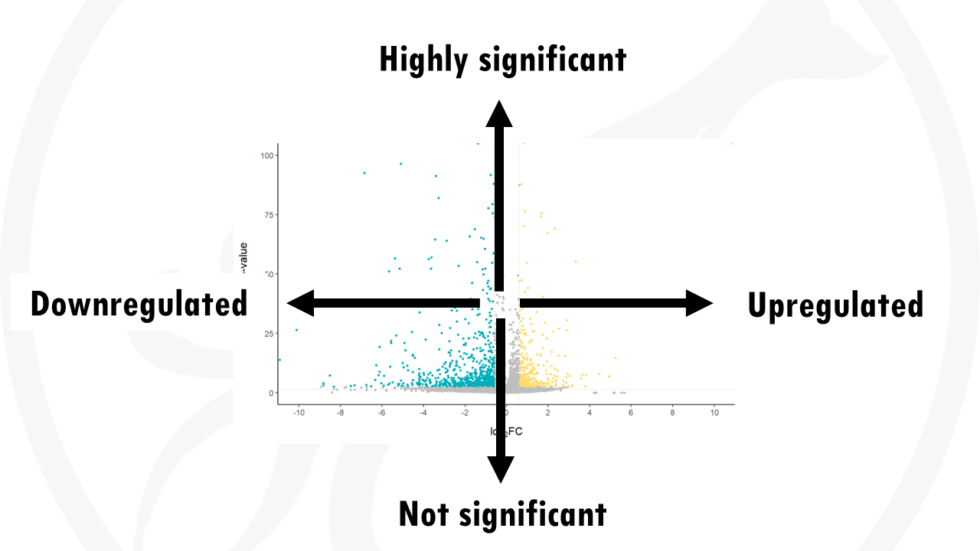

Smp_319450, Smp_319430, Smp_133770, Smp_330900 selected for PCA plot

In [10]:
selected_genes <- norm_counts_long |>
    filter(gene_id == 'Smp_133770' | gene_id == 'Smp_210300' | gene_id == 'Smp_319430' | gene_id == 'Smp_319450')
selected_genes

gene_id,sample,replicate,norm_count
<chr>,<chr>,<chr>,<dbl>
Smp_133770,Int,01,80.3520494
Smp_133770,Int,02,78.6844967
Smp_133770,Int,03,61.2626921
Smp_133770,Int,04,118.4728922
Smp_133770,Liv,01,2.2125622
Smp_133770,Liv,02,32.6679860
Smp_133770,Liv,03,11.9958036
Smp_133770,Liv,04,28.6655918
Smp_210300,Int,01,16.9975489


Saving 6.67 x 6.67 in image


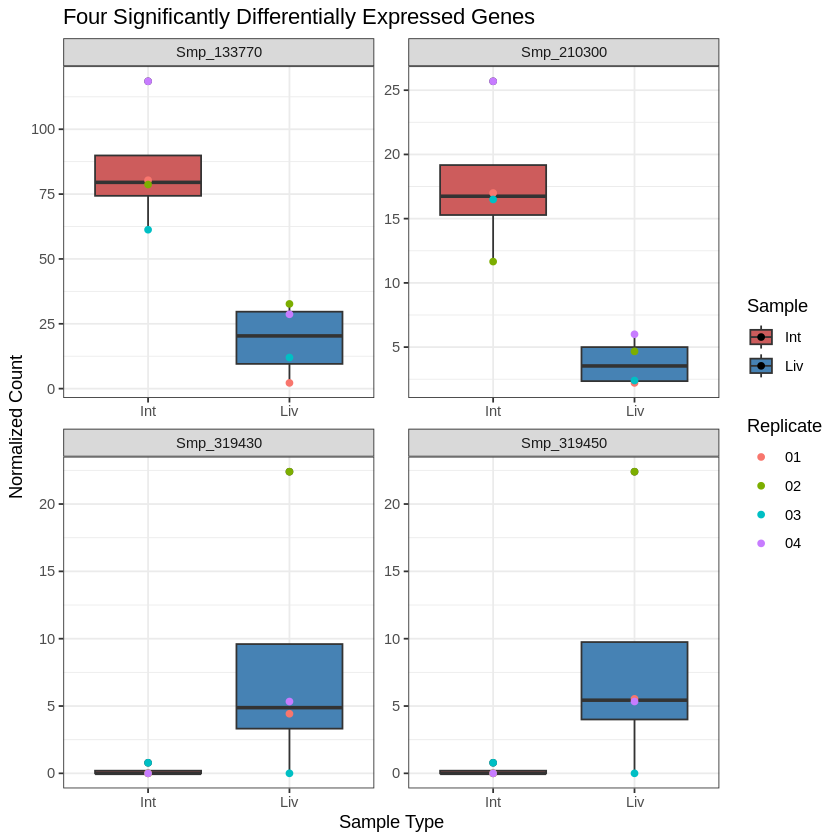

In [17]:
DEG_plot <- selected_genes |>
    ggplot(aes(x = sample, y = norm_count, fill = sample)) +
        geom_boxplot() +
        geom_point(aes(color = replicate)) +
    facet_wrap(facets = vars(gene_id), scales = "free") +
    labs(
        title = 'Four Significantly Differentially Expressed Genes', 
        color = 'Replicate',
        fill = 'Sample'
    ) +
    xlab('Sample Type') +
    ylab('Normalized Count')

DEG_plot <- DEG_plot + theme_bw() + scale_fill_manual(values = c('#CD5C5C', '#4682B4'))
DEG_plot
ggsave('plots/DEGs_plot.png', DEG_plot)

## Information on DEGs

Smp_319450: Protein coding gene, no gene ontology report

Smp_319430: Protein coding gene, no gene ontology report

Smp_210300:
- Molecular Function: metal ion binding -- produce proteins that can bind to metal ions to prevent overaccumulation or can move ions around as cell needs

Smp_133770:
- Biological Process: nitrogen compound metabolic process -- breaks down nitrogen-containing compounds and transforms them to be used for other cellular activities.
- Molecular Function: catalytic activity, glutamate-ammonia ligase activity	-- able to speed up reactions in cells, converts glutamate and ammonia into glutamine